## Method

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine      Learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## All imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline

In [2]:
# Set the path to housing csv file
housing = pd.read_csv(r'housing.csv')

In [3]:
# This function generates and displays a visual representation of a confusion matrix.
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

#### Storing the data in the way we want it


In [4]:
# Filter the "housing" df to include only rows where the 'median_house_value' is less than or equal to 500000
housing_clean = housing[housing["median_house_value"] <= 500000]
# Remove any rows with missing values (NaN) from the filtered df
housing_clean = housing_clean.dropna()
housing_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
# Create dummy variables for "ocean_proximity" and convert the column into float64 values.
ocean_proximity_matrix = pd.get_dummies(pd.Series(housing["ocean_proximity"]), dtype=float)
ocean_proximity_matrix

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [6]:
# Remove cloumn 'ocean_proximity' with object values and join the new matrix where 'ocean_proximity'
# has been converted to float46-values thanks to get_dummies() function in pandas,
# and drop any rows with missing values.
housing_modified = housing_clean.copy()
housing_modified = housing_modified.drop('ocean_proximity', axis=1)
housing_modified_ocean = pd.concat([housing_modified, ocean_proximity_matrix], axis=1)
housing_modified_ocean.dropna(inplace=True)
housing_modified_ocean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


In [7]:
# Create a copy of 'housing_modified_ocean' df, remove the 'median_house_value' column, and assign the modified df to 'X'.
X = housing_modified_ocean.copy() 
X = X.drop(columns = ['median_house_value'])
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0.0,1.0,0.0,0.0,0.0


In [8]:
# Create a copy of the 'median_house_value' column from 'housing_modified_ocean' df and assign it to 'y'.
y = housing_modified_ocean['median_house_value'].copy()
y.info()

<class 'pandas.core.series.Series'>
Index: 19475 entries, 0 to 20639
Series name: median_house_value
Non-Null Count  Dtype  
--------------  -----  
19475 non-null  float64
dtypes: float64(1)
memory usage: 304.3 KB


In [9]:
# Display descriptive statistics of the 'median_house_value' column in 'housing_modified_ocean' df.
y.describe()

count     19475.000000
mean     192444.651913
std       97702.625782
min       14999.000000
25%      116500.000000
50%      173800.000000
75%      248100.000000
max      500000.000000
Name: median_house_value, dtype: float64

In [10]:
# Display the values of the 'y' variable
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 19475, dtype: float64

In [11]:
# Display information about the df 'X', including the data types, non-null values, and memory usage.
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19475 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19475 non-null  float64
 1   latitude            19475 non-null  float64
 2   housing_median_age  19475 non-null  float64
 3   total_rooms         19475 non-null  float64
 4   total_bedrooms      19475 non-null  float64
 5   population          19475 non-null  float64
 6   households          19475 non-null  float64
 7   median_income       19475 non-null  float64
 8   <1H OCEAN           19475 non-null  float64
 9   INLAND              19475 non-null  float64
 10  ISLAND              19475 non-null  float64
 11  NEAR BAY            19475 non-null  float64
 12  NEAR OCEAN          19475 non-null  float64
dtypes: float64(13)
memory usage: 2.1 MB


In [12]:
# Split the dataset into training and testing sets, test size is set to 20% of the dataset, and random state of 42 is used for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Standardize the features in both the training and testing sets using StandardScaler.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# EDA
-- Describe why we do this

In [14]:
# Overview of the data
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
# Display information about housing data.
# "We found that the data has missing values in the column 'total_bedrooms'
# Drop null data, as it is 1%.....
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


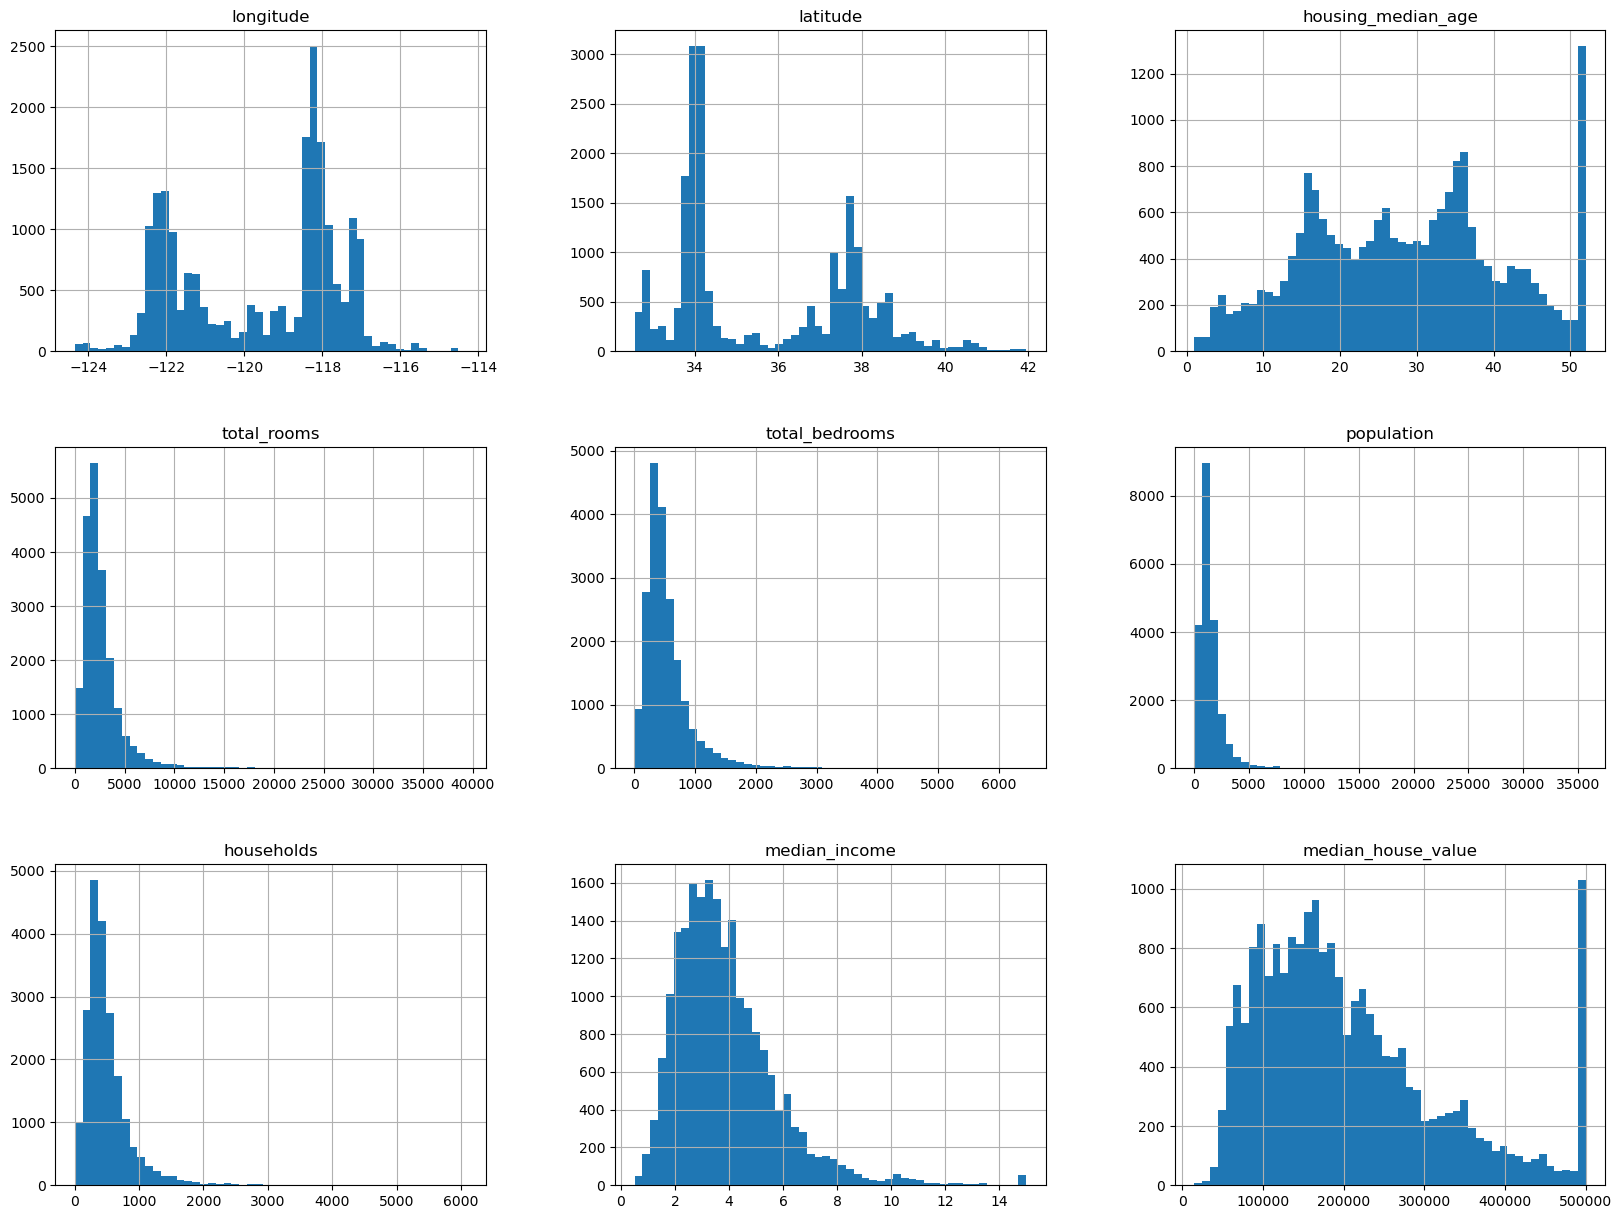

In [16]:
# Display histograms for all numerical attributes in the 'housing' df.
housing.hist(bins=50, figsize=(20, 15))
print()

In [17]:
# Display descriptive statistics of the 'housing_modified_ocean' df
housing_modified_ocean.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000,19475.000000
mean,-119.564306,35.653372,28.378074,2620.491142,539.645751,1440.290732,501.093504,3.676739,192444.651913,0.436714,0.332169,0.000257,0.106650,0.124211
std,2.006241,2.150250,12.515373,2184.938093,422.413200,1144.399323,383.206416,1.569263,97702.625782,0.495991,0.471004,0.016021,0.308675,0.329830
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.760000,33.930000,18.000000,1441.000000,297.000000,796.000000,282.000000,2.526500,116500.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.500000,34.270000,28.000000,2111.000000,436.000000,1178.000000,411.000000,3.451900,173800.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-117.990000,37.730000,37.000000,3118.000000,648.000000,1743.000000,606.000000,4.583300,248100.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500000.000000,1.000000,1.000000,1.000000,1.000000,1.000000


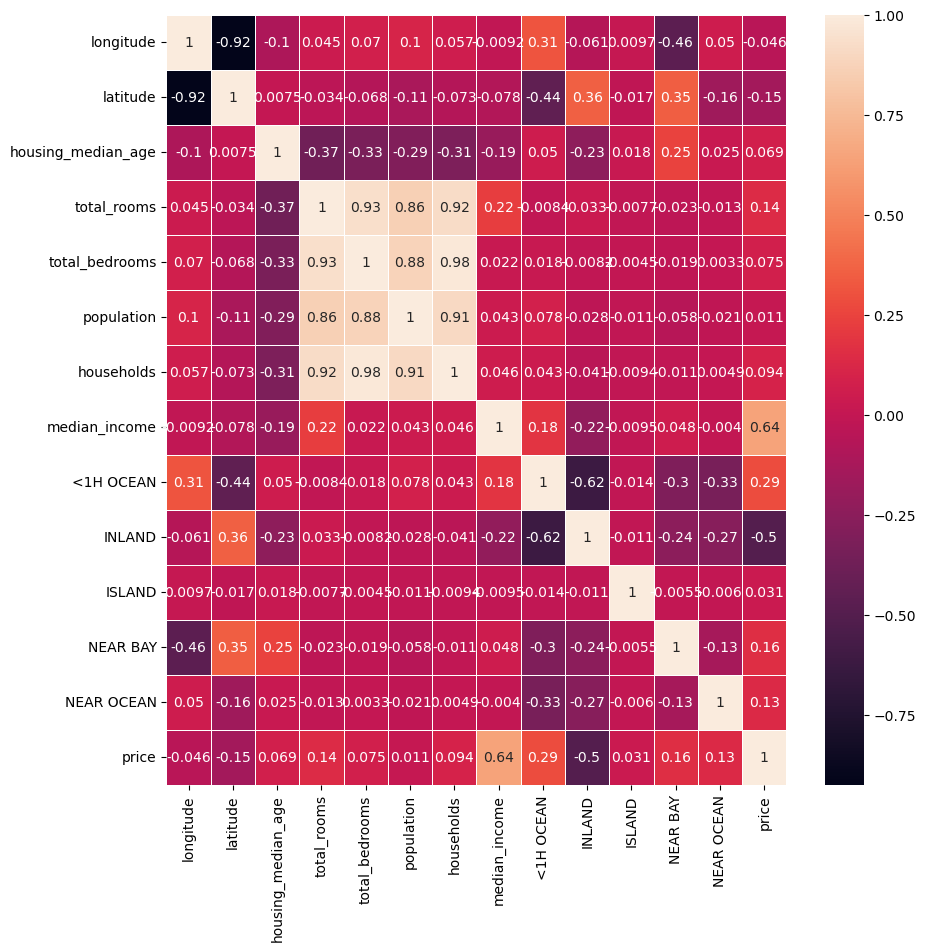

In [18]:
# Create a copy of 'housing_modified_ocean' DataFrame and assign it to 'df'. 
# Then, create a new column 'price' containing the values of 'median_house_value' and drop the original column.
df = housing_modified_ocean.copy()
df["price"] = housing_modified_ocean['median_house_value']
df.drop(columns=['median_house_value'], inplace=True)

# Calculate the correlation matrix between features and 'price' column.
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix.
fig, ax = plt.subplots(figsize=(10,10))   
ax = sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

C:\Users\olsso\AppData\Local\Temp\ipykernel_34236\318752960.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


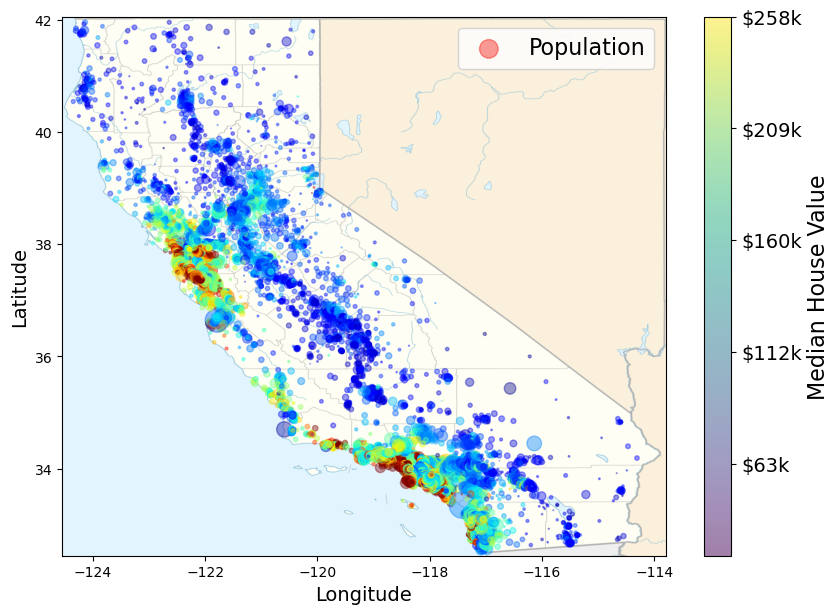

In [19]:
california_img=mpimg.imread('california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.set_label('Median House Value', fontsize=16)
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


plt.legend(fontsize=16)
plt.show()

 The correlation coefficient between median house value and median income is 0.6427


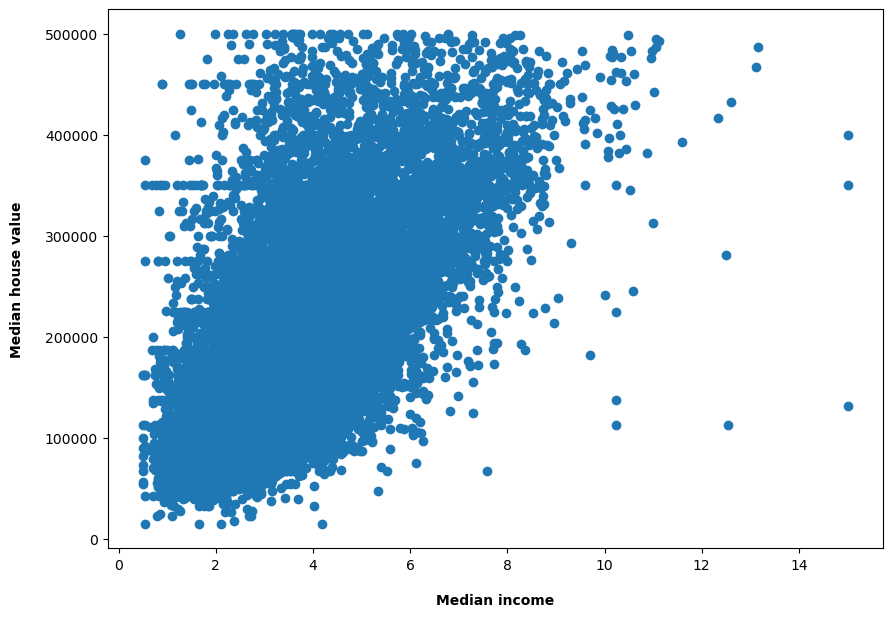

In [20]:
# A scatter plot comparing median income and median house value from 'housing_clean' df.
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(housing_clean['median_income'], housing_clean['median_house_value'], alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Median income', labelpad=15, fontweight='bold')
 
# Calculate and print the correlation coefficient between median income and median house value.
correlation = np.corrcoef(housing_clean['median_income'], housing_clean['median_house_value'])
print(f' The correlation coefficient between median house value and median income is {round(correlation[1][0], 4)}')

 The correlation coefficient between median house value and total rooms is 0.1422


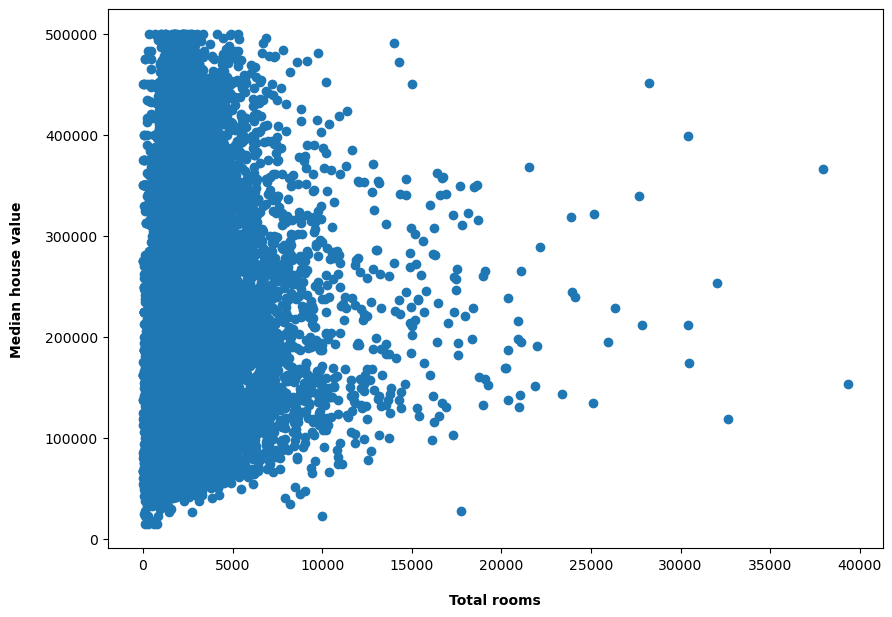

In [21]:
# Create a scatter plot comparing total rooms and median house value from 'housing_clean' df,
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(housing_clean['total_rooms'], housing_clean['median_house_value'], alpha=1)
ax.set_ylabel('Median house value', labelpad=15, fontweight='bold')
ax.set_xlabel('Total rooms', labelpad=15, fontweight='bold')
 
# Calculate and print the correlation coefficient between total rooms and median house value.
correlation = np.corrcoef(housing_clean['total_rooms'], housing_clean['median_house_value'])
print(f' The correlation coefficient between median house value and total rooms is {round(correlation[1][0], 4)}')

## Model Selection

1. Linear Regression 
2. Lasso 
3. Random Forest Regression
4. Beslutsträd
5. SVM
6. Extra Tree

In [22]:
y_train.describe()

count     15580.000000
mean     192150.461874
std       97522.058825
min       14999.000000
25%      116300.000000
50%      173900.000000
75%      246600.000000
max      500000.000000
Name: median_house_value, dtype: float64

In [23]:
# mean from y_train.describe(), 192150.461874
# fit_intercept=False -> If set to False, no intercept will be used in calculations (i.e. data is expected to be centered).
lin_reg = LinearRegression(fit_intercept=False)

scores_lr = cross_validate(lin_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_lr))
print('RMSE:', np.sqrt(np.mean(-scores_lr)))

RMSE for each iteration: [202354.515254   202585.69279008 200410.05180463]
RMSE: 201785.7788441775


In [24]:
lasso = Lasso()
hyper_param_lasso = {'alpha':(0.01, 1, 2, 5, 10, 15)}
lasso_reg = GridSearchCV(lasso, hyper_param_lasso, cv = 5)
lasso_reg.fit(X_train_scaled, y_train) 

print(lasso_reg.best_params_) 

scores_lasso = cross_validate(lasso_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]

print('RMSE for each iteration:', np.sqrt(-scores_lasso))

print('RMSE:', np.sqrt(np.mean(-scores_lasso)))

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+12, tolerance: 1.181e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.423e+12, tolerance: 1.184e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.424e+12, toleranc

{'alpha': 15}


C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.150e+11, tolerance: 7.840e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.304e+11, tolerance: 7.875e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.298e+11, toleranc

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.302e+11, tolerance: 7.854e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.985e+11, tolerance: 7.977e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.338e+11, toleranc

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+10, tolerance: 7.919e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+10, tolerance: 7.975e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.215e+10, toleranc

RMSE for each iteration: [61791.47283805 61622.68304236 59612.23125243]
RMSE: 61016.8263561466


C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+10, tolerance: 7.942e+09
  model = cd_fast.enet_coordinate_descent(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+10, tolerance: 9.931e+09
  model = cd_fast.enet_coordinate_descent(


In [25]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
forest_reg.fit(X_train_scaled, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

{'max_depth': None, 'n_estimators': 120}
RMSE for each iteration: [45908.31040847 46943.73310242 45804.93543564]
RMSE: 46221.85324574932


In [26]:
forest = RandomForestRegressor()
param_grid = { 
    'n_estimators': [10, 100, 120],
    'max_depth' : [None, 5, 10],
}
forest_reg = GridSearchCV(forest, param_grid=param_grid, cv= 5)
forest_reg.fit(X_train_scaled, y_train)

print(forest_reg.best_params_)

scores_forest = cross_validate(forest_reg, X_train_scaled, y_train, cv=3, scoring = 'neg_mean_squared_error')["test_score"]
print('RMSE for each iteration:', np.sqrt(-scores_forest))
print('RMSE:', np.sqrt(np.mean(-scores_forest)))

{'max_depth': None, 'n_estimators': 120}
RMSE for each iteration: [46220.93461902 46757.46936871 45728.72030991]
RMSE: 46237.6167206024


In [27]:
# havn't test runned it 
svm_clf = LinearSVC(max_iter=5000, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_clf.score(X_test, y_test)

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


0.0

In [28]:
# havn't test runned it 
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)

C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\olsso\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


0.0